In [59]:
# import libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import talib
import seaborn as sns


In [60]:
# Download latest version of yahoo stock price dataset from Kaggle
path = kagglehub.dataset_download("arashnic/time-series-forecasting-with-yahoo-stock-price")
print("Path to dataset files:", path)
yahoo = pd.read_csv(path + "/yahoo_stock.csv")
yahoo['Date'] = pd.to_datetime(yahoo['Date'])
print(yahoo.head())

Path to dataset files: C:\Users\mckin\.cache\kagglehub\datasets\arashnic\time-series-forecasting-with-yahoo-stock-price\versions\3
        Date         High          Low         Open        Close  \
0 2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1 2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2 2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3 2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4 2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  


Look at the data

<Axes: >

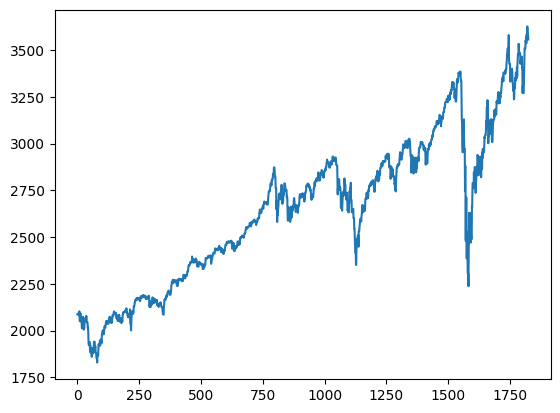

In [61]:
yahoo['Adj Close'].plot()

<Axes: >

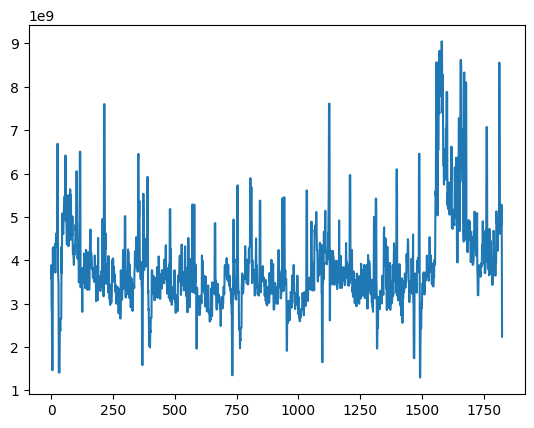

In [62]:
yahoo['Volume'].plot()

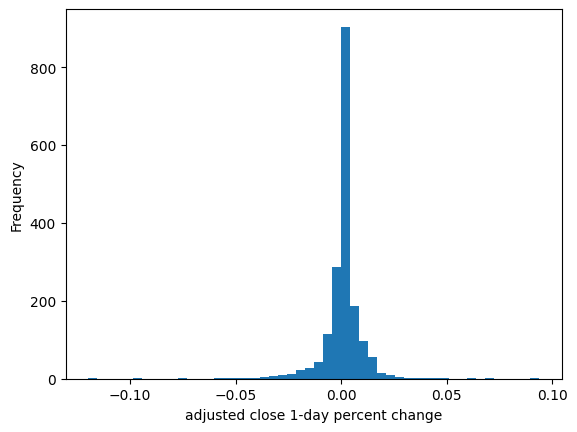

In [63]:
yahoo['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [64]:
yahoo['10d_future_close'] = yahoo['Adj Close'].shift(-10)
yahoo['10d_future_close_pct'] = yahoo['10d_future_close'].pct_change(10)
yahoo['10d_close_pct'] = yahoo['Adj Close'].pct_change(10)

# calculate the correlation matrix between the 5d close percentage changes (current and future)
corr = yahoo[['10d_close_pct', '10d_future_close_pct']].corr()
print(corr)


                      10d_close_pct  10d_future_close_pct
10d_close_pct               1.00000               0.02393
10d_future_close_pct        0.02393               1.00000


C:\Users\mckin\AppData\Local\Temp\ipykernel_7020\1275700740.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yahoo['10d_future_close_pct'] = yahoo['10d_future_close'].pct_change(10)


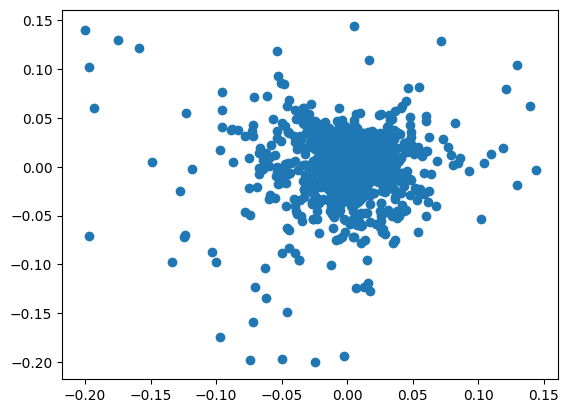

In [65]:
# scatter the current 10-day percent change vs the future 10-day percent change
plt.scatter(yahoo['10d_close_pct'], yahoo['10d_future_close_pct'])
plt.show()

Prepare data for ML

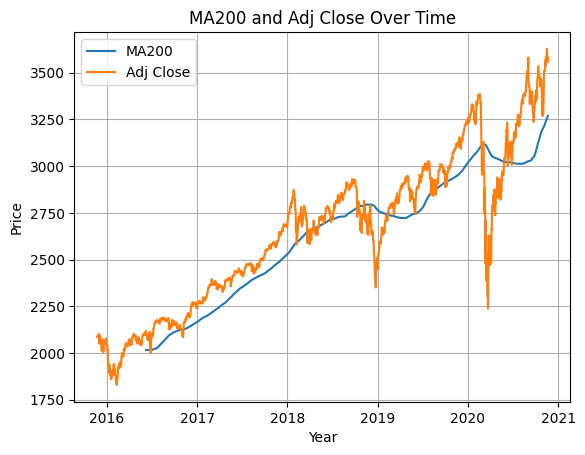

In [66]:
features = yahoo[['10d_close_pct', 'Adj Close', 'Volume']]
# our targets are the future price changes
targets = yahoo['10d_future_close_pct']

yahoo['ma200'] = talib.SMA(yahoo['Adj Close'].values, timeperiod=200)
yahoo['rsi200'] = talib.RSI(yahoo['Adj Close'].values, timeperiod=200)

#plt the adj close price against the 200 day moving average
plt.plot(yahoo['Date'], yahoo['ma200'], label='MA200', linewidth=1.5)
plt.plot(yahoo['Date'], yahoo['Adj Close'], label='Adj Close', linewidth=1.5)

# Format x-axis ticks to show years only
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Add labels, title, and legend
plt.title('MA200 and Adj Close Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [67]:

feature_names = ['10d_close_pct', 'ma200', 'rsi200']
features = yahoo[feature_names]

targets = yahoo['10d_future_close_pct']

feature_target_df = yahoo[feature_names + '10d_future_close_pct']

corr = feature_target_df.corr()
sns.heatmap(corr, annot=True)

TypeError: can only concatenate list (not "str") to list